## Interpolacja 

W poniższych zadaniach wykorzystać funkcje z ćwiczenia poprzedniego. Proszę także użyć tych samych zbiorów punktów. 

#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 

In [94]:
import numpy as np
from tabulate import tabulate
import sympy as sp
import matplotlib.pyplot as plt
import math


newton_rel_errors = []
newton_abs_errors = []
hermite_rel_errors = []
hermite_abs_errors = []
bspline_rel_errors = []
bspline_abs_errors = []


def to_table(min, max, number_of_points, func, func_name):
    step = (max - min) / number_of_points
    table = []
    x_values = []
    y_values = []
    for i in np.arange(min, max + step, step):
        table.append([i, func(i)])
        x_values.append(i)
        y_values.append(func(i))
    return x_values, y_values, tabulate(table, headers=["x", func_name],
                                        tablefmt="grid", floatfmt=".10f")


def to_chart(min, max, number_of_points, fun1, poly_calc, polynomial, fun_name):
    x_axis = []
    f1_values = []
    f2_values = []
    step = (max - min) / number_of_points
    for x in np.arange(min, max+step, step):
        x_axis.append(x)
        f1_values.append(fun1(x))
        f2_values.append(poly_calc(polynomial, x))

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="Interpolated " + fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Comparison of " + fun_name + " and its interpolation")
    plt.legend()
    plt.show()


def cmp_inbetween_points(min, max, number_of_points, fun1, poly_calc, polynomial, fun_name, rel_errors, abs_errors):
    table = []
    step = (max - min) / number_of_points
    for x in np.arange(min + (step / 2), max + (step / 2), step):
        table.append([x, fun1(x), poly_calc(polynomial, x),
                      abs(poly_calc(polynomial, x) - fun1(x)) / fun1(x),
                      abs(poly_calc(polynomial, x) - fun1(x))])
        rel_errors.append(abs(poly_calc(polynomial, x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(poly_calc(polynomial, x) - fun1(x)))
    print(tabulate(table, headers=["x", fun_name, "Interpolation of " + fun_name, "Relative error", "Absolute error"],
                   tablefmt="grid", floatfmt=".10f"))


def calculate(f, x):
    X = sp.symbols("x")
    return f.evalf(subs={X: x})


def coefficients(x_array, y_array):
    n = len(x_array)
    res_tab = np.copy(y_array)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            res_tab[i] = float(res_tab[i] - res_tab[i-1]) / float(x_array[i] - x_array[i-j])
    return np.array(res_tab)


def newton_polynomial(coeffs_array, x_array):
    X = sp.symbols("x")
    n = len(coeffs_array)
    res = 0
    for i in range(n):
        part = 1
        for j in range(i):
            part *= (X - x_array[j])
        res += part * coeffs_array[i]
    return sp.simplify(res)


def comparison(min, max, n, rel_errors, abs_errors):
    sqrt_x_arr, sqrt_y_arr, sqrt_x_y = to_table(min, max, n, math.sqrt, "sqrt(x)")
    sqrt_coeffs = coefficients(sqrt_x_arr, sqrt_y_arr)
    sqrt_approx = newton_polynomial(sqrt_coeffs, sqrt_x_arr)
    print(sqrt_x_y)
    cmp_inbetween_points(min, max, n, math.sqrt, calculate, sqrt_approx, "sqrt(x)", rel_errors, abs_errors)
    to_chart(min, max, 1000, math.sqrt, calculate, sqrt_approx, "sqrt(x)")

    sin_x_arr, sin_y_arr, sin_x_y = to_table(min, max, n, math.sin, "sin(x)")
    sin_coefs = coefficients(sin_x_arr, sin_y_arr)
    sin_approx = newton_polynomial(sin_coefs, sin_x_arr)
    print(sin_x_y)
    cmp_inbetween_points(min, max, n, math.sin, calculate, sin_approx, "sin(x)", rel_errors, abs_errors)
    to_chart(min, max, 1000, math.sin, calculate, sin_approx, "sin(x)")

    f = lambda x: x**3 + 2*x
    f_x_arr, f_y_arr, f_x_y = to_table(min, max, n, f, "x^3 + 2x")
    f_coefs = coefficients(f_x_arr, f_y_arr)
    f_approx = newton_polynomial(f_coefs, f_x_arr)
    print(f_x_y)
    cmp_inbetween_points(min, max, n, f, calculate, f_approx, "x^3 + 2x", rel_errors, abs_errors)
    to_chart(min, max, 1000, f, calculate, f_approx, "x^3 + 2x")


Interpolacja dla 3 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 2.5000000000 | 1.5811388301 |               1.2817662756 |     0.1893398282 |     0.2993725545 |
+--------------+--------------+----------------------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 |               2.8629051057 |     0.0453851376 |     0.1242923182 |
+--------------+--------------+----------------------------+------------------+------------------+


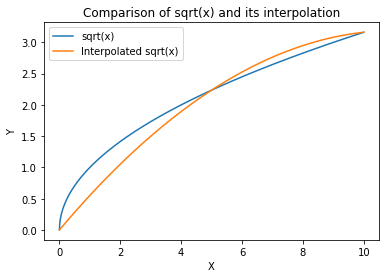

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+--------------+---------------------------+------------------+------------------+
|            x |       sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+==============+===========================+==================+==================+
| 2.5000000000 | 0.5984721441 |             -0.6511905671 |     2.0880883489 |     1.2496627112 |
+--------------+--------------+---------------------------+------------------+------------------+
| 7.5000000000 | 0.9379999768 |             -0.9232011226 |     1.9842229696 |     1.8612010994 |
+--------------+--------------+---------------------------+------------------+------------------+


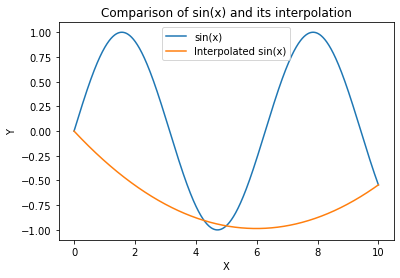

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 2.5000000000 |  20.6250000000 |              -26.2500000000 |     2.2727272727 |    46.8750000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 7.5000000000 | 436.8750000000 |              483.7500000000 |     0.1072961373 |    46.8750000000 |
+--------------+----------------+-----------------------------+-

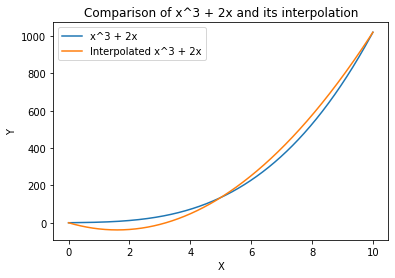

In [95]:
comparison(0, 10, 2, newton_rel_errors, newton_abs_errors)

Interpolacja dla 4 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.6666666667 | 1.2909944487 |               1.1024038155 |     0.1460816764 |     0.1885906332 |
+--------------+--------------+----------------------------+------------------+------------------+
| 5.0000000000 | 2.2360679775 |               2.2817061964 |     0.0204100320 |     0.0456382189 |
+--------------+--------------+------------

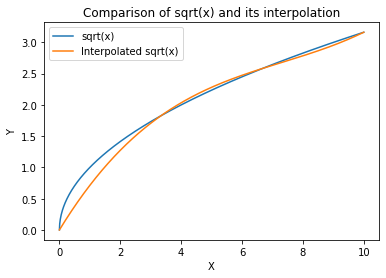

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  3.3333333333 | -0.1905679629 |
+---------------+---------------+
|  6.6666666667 |  0.3741512306 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 1.6666666667 |  0.9954079578 |             -0.3295810442 |     1.3311014761 |     1.3249890019 |
+--------------+---------------+---------------------------+------------------+------------------+
| 5.0000000000 | -0.9589242747 |              0.1372669075 |    -1.1431467647 |     1.0961911822 |
+--------------+---------------+

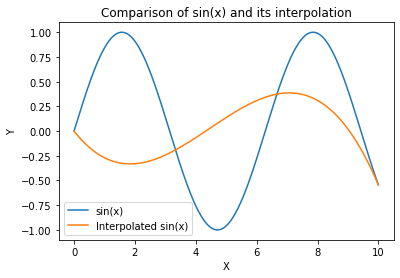

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  3.3333333333 |   43.7037037037 |
+---------------+-----------------+
|  6.6666666667 |  309.6296296296 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 1.6666666667 |   7.9629629630 |                7.9629629630 |     0.0000000000 |     0.0000000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 5.0000000000 | 135.0000000000 |              135.0000000000 |     0.0000000000 |     0.00000

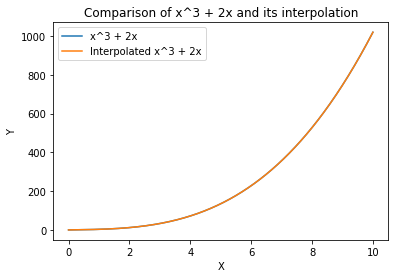

In [96]:
comparison(0, 10, 3, newton_rel_errors, newton_abs_errors)

Interpolacja dla 5 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.2500000000 | 1.1180339887 |               0.9820659964 |     0.1216134695 |     0.1359679924 |
+--------------+--------------+----------------------------+------------------+------------------+
| 3.7500000000 | 1.9364916731 |               1.9596017579 |     0.011933996

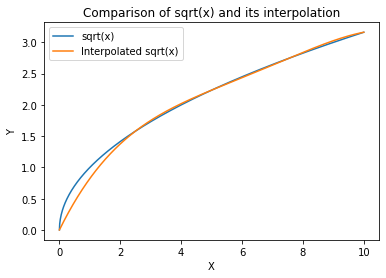

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  2.5000000000 |  0.5984721441 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
|  7.5000000000 |  0.9379999768 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 1.2500000000 |  0.9489846194 |              1.4054289399 |     0.4809817896 |     0.4564443205 |
+--------------+---------------+---------------------------+------------------+------------------+
| 3.7500000000 | -0.5715613187 |             -0.5530228042 |   

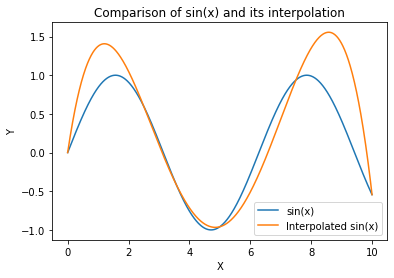

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  2.5000000000 |   20.6250000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
|  7.5000000000 |  436.8750000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 1.2500000000 |   4.4531250000 |                4.4531250000 |     0.0000000000 |     0.0000000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 3.7500000000 |  60.2

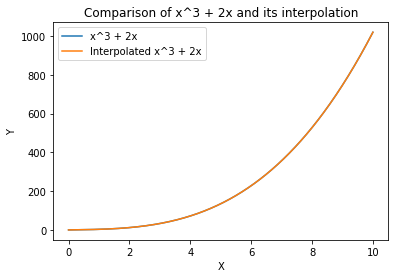

In [97]:
comparison(0, 10, 4, newton_rel_errors, newton_abs_errors)

Interpolacja dla 8 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 0.7142857143 | 0.8451542547 |               0.7729116136 |     0.085478645

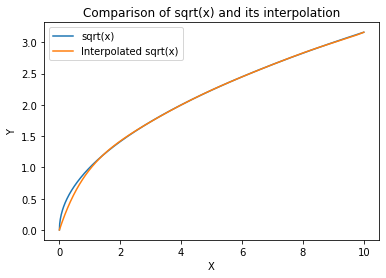

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  1.4285714286 |  0.9899030764 |
+---------------+---------------+
|  2.8571428571 |  0.2806293995 |
+---------------+---------------+
|  4.2857142857 | -0.9103469443 |
+---------------+---------------+
|  5.7142857143 | -0.5387052884 |
+---------------+---------------+
|  7.1428571429 |  0.7576284154 |
+---------------+---------------+
|  8.5714285714 |  0.7534867274 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 0.7142857143 |  0.6550778972 |              0.530484029

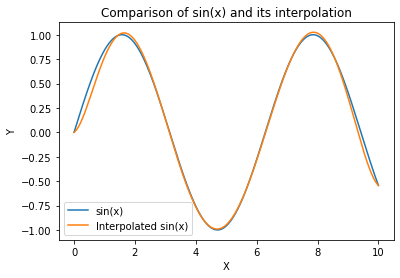

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  1.4285714286 |    5.7725947522 |
+---------------+-----------------+
|  2.8571428571 |   29.0379008746 |
+---------------+-----------------+
|  4.2857142857 |   87.2886297376 |
+---------------+-----------------+
|  5.7142857143 |  198.0174927114 |
+---------------+-----------------+
|  7.1428571429 |  378.7172011662 |
+---------------+-----------------+
|  8.5714285714 |  646.8804664723 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 0.714285

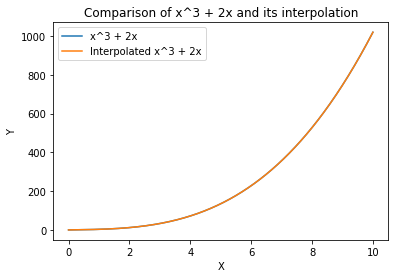

In [98]:
comparison(0, 10, 7, newton_rel_errors, newton_abs_errors)

#### Zadanie 2: Interpolacja metodą Hermite'a 
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji). 

In [99]:
def hermite_polynomial(x_array, y_array):
    n = len(x_array)
    derivatives = [0] * n

    for i in range(1, n):
        if x_array[i] == x_array[i-1]:
            derivatives[i] = derivatives[i-1] + 1
        else:
            derivatives[i] = 0
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            if derivatives[j] == 0:
                y_array[j] = \
                    (y_array[j] - y_array[int(j-1 - derivatives[j-1])]) / (x_array[j] - x_array[j - i])
            else:
                y_array[j] /= float(i)
                derivatives[j] -= 1
    for j in range(n - 1, -1, -1):
        for i in range(j, n - 1, 1):
            y_array[i] = y_array[i] - y_array[i+1] * x_array[j]
    polynomial = 0
    X = sp.symbols('x')  
    for i in range(n):
        polynomial += y_array[i]*pow(X, i)

    return polynomial


def comparison2(min, max, n, rel_errors, abs_errors):
    sqrt_x_arr, sqrt_y_arr, sqrt_x_y = to_table(min, max, n, math.sqrt, "sqrt(x)")
    sqrt_approx = hermite_polynomial(sqrt_x_arr, sqrt_y_arr)
    print(sqrt_x_y)
    cmp_inbetween_points(min, max, n, math.sqrt, calculate, sqrt_approx, "sqrt(x)", rel_errors, abs_errors)
    to_chart(min, max, 1000, math.sqrt, calculate, sqrt_approx, "sqrt(x)")

    sin_x_arr, sin_y_arr, sin_x_y = to_table(min, max, n, math.sin, "sin(x)")
    sin_approx = hermite_polynomial(sin_x_arr, sin_y_arr)
    print(sin_x_y)
    cmp_inbetween_points(min, max, n, math.sin, calculate, sin_approx, "sin(x)", rel_errors, abs_errors)
    to_chart(min, max, 1000, math.sin, calculate, sin_approx, "sin(x)")

    f = lambda x: x**3 + 2*x
    f_x_arr, f_y_arr, f_x_y = to_table(min, max, n, f, "x^3 + 2x")
    f_approx = hermite_polynomial(f_x_arr, f_y_arr)
    print(f_x_y)
    cmp_inbetween_points(min, max, n, f, calculate, f_approx, "x^3 + 2x", rel_errors, abs_errors)
    to_chart(min, max, 1000, f, calculate, f_approx, "x^3 + 2x")



Interpolacja dla 3 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 2.5000000000 | 1.5811388301 |               1.2817662756 |     0.1893398282 |     0.2993725545 |
+--------------+--------------+----------------------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 |               2.8629051057 |     0.0453851376 |     0.1242923182 |
+--------------+--------------+----------------------------+------------------+------------------+


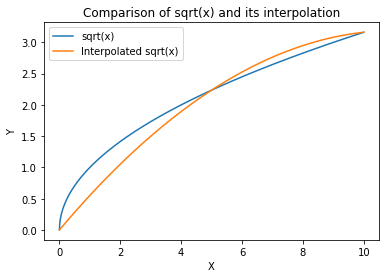

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+--------------+---------------------------+------------------+------------------+
|            x |       sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+==============+===========================+==================+==================+
| 2.5000000000 | 0.5984721441 |             -0.6511905671 |     2.0880883489 |     1.2496627112 |
+--------------+--------------+---------------------------+------------------+------------------+
| 7.5000000000 | 0.9379999768 |             -0.9232011226 |     1.9842229696 |     1.8612010994 |
+--------------+--------------+---------------------------+------------------+------------------+


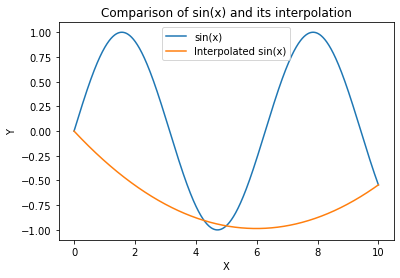

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 2.5000000000 |  20.6250000000 |              -26.2500000000 |     2.2727272727 |    46.8750000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 7.5000000000 | 436.8750000000 |              483.7500000000 |     0.1072961373 |    46.8750000000 |
+--------------+----------------+-----------------------------+-

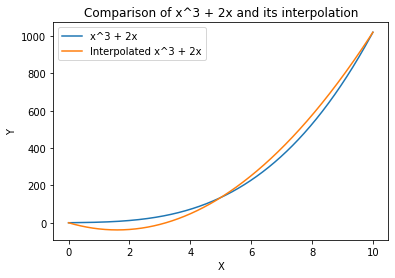

In [100]:
comparison2(0, 10, 2, hermite_rel_errors, hermite_abs_errors)

Interpolacja dla 4 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.6666666667 | 1.2909944487 |               1.1024038155 |     0.1460816764 |     0.1885906332 |
+--------------+--------------+----------------------------+------------------+------------------+
| 5.0000000000 | 2.2360679775 |               2.2817061964 |     0.0204100320 |     0.0456382189 |
+--------------+--------------+------------

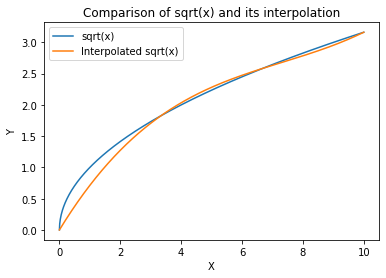

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  3.3333333333 | -0.1905679629 |
+---------------+---------------+
|  6.6666666667 |  0.3741512306 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 1.6666666667 |  0.9954079578 |             -0.3295810442 |     1.3311014761 |     1.3249890019 |
+--------------+---------------+---------------------------+------------------+------------------+
| 5.0000000000 | -0.9589242747 |              0.1372669075 |    -1.1431467647 |     1.0961911822 |
+--------------+---------------+

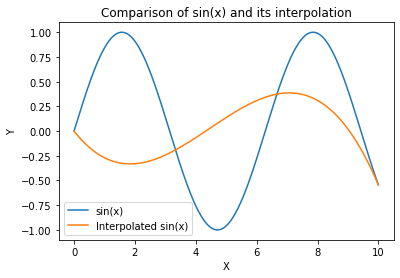

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  3.3333333333 |   43.7037037037 |
+---------------+-----------------+
|  6.6666666667 |  309.6296296296 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 1.6666666667 |   7.9629629630 |                7.9629629630 |     0.0000000000 |     0.0000000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 5.0000000000 | 135.0000000000 |              135.0000000000 |     0.0000000000 |     0.00000

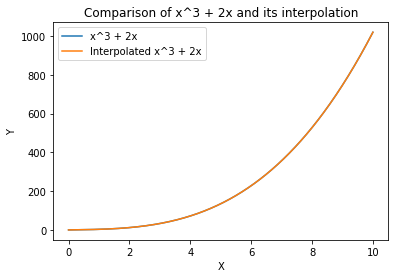

In [101]:
comparison2(0, 10, 3, hermite_rel_errors, hermite_abs_errors)

Interpolacja dla 5 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.2500000000 | 1.1180339887 |               0.9820659964 |     0.1216134695 |     0.1359679924 |
+--------------+--------------+----------------------------+------------------+------------------+
| 3.7500000000 | 1.9364916731 |               1.9596017579 |     0.011933996

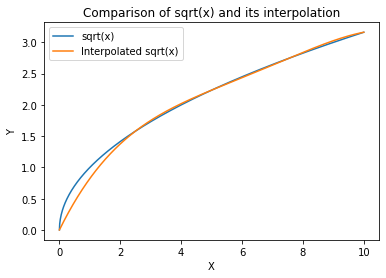

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  2.5000000000 |  0.5984721441 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
|  7.5000000000 |  0.9379999768 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 1.2500000000 |  0.9489846194 |              1.4054289399 |     0.4809817896 |     0.4564443205 |
+--------------+---------------+---------------------------+------------------+------------------+
| 3.7500000000 | -0.5715613187 |             -0.5530228042 |   

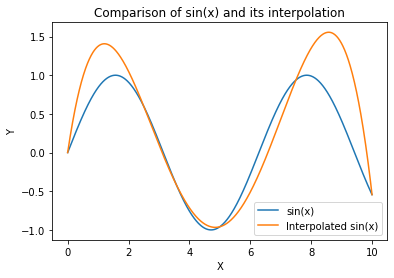

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  2.5000000000 |   20.6250000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
|  7.5000000000 |  436.8750000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 1.2500000000 |   4.4531250000 |                4.4531250000 |     0.0000000000 |     0.0000000000 |
+--------------+----------------+-----------------------------+------------------+------------------+
| 3.7500000000 |  60.2

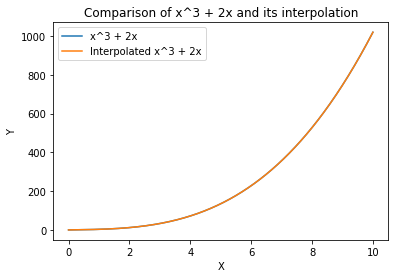

In [102]:
comparison2(0, 10, 4, hermite_rel_errors, hermite_abs_errors)

Interpolacja dla 8 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 0.7142857143 | 0.8451542547 |               0.7729116136 |     0.085478645

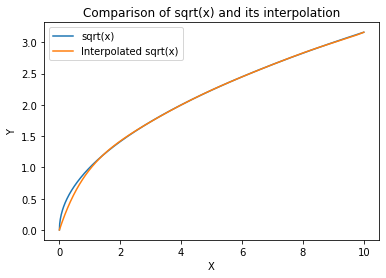

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  1.4285714286 |  0.9899030764 |
+---------------+---------------+
|  2.8571428571 |  0.2806293995 |
+---------------+---------------+
|  4.2857142857 | -0.9103469443 |
+---------------+---------------+
|  5.7142857143 | -0.5387052884 |
+---------------+---------------+
|  7.1428571429 |  0.7576284154 |
+---------------+---------------+
|  8.5714285714 |  0.7534867274 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------------------+------------------+------------------+
|            x |        sin(x) |   Interpolation of sin(x) |   Relative error |   Absolute error |
+==============+===============+===========================+==================+==================+
| 0.7142857143 |  0.6550778972 |              0.530484029

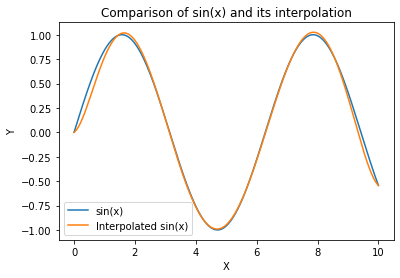

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  1.4285714286 |    5.7725947522 |
+---------------+-----------------+
|  2.8571428571 |   29.0379008746 |
+---------------+-----------------+
|  4.2857142857 |   87.2886297376 |
+---------------+-----------------+
|  5.7142857143 |  198.0174927114 |
+---------------+-----------------+
|  7.1428571429 |  378.7172011662 |
+---------------+-----------------+
|  8.5714285714 |  646.8804664723 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+-----------------------------+------------------+------------------+
|            x |       x^3 + 2x |   Interpolation of x^3 + 2x |   Relative error |   Absolute error |
+==============+================+=============================+==================+==================+
| 0.714285

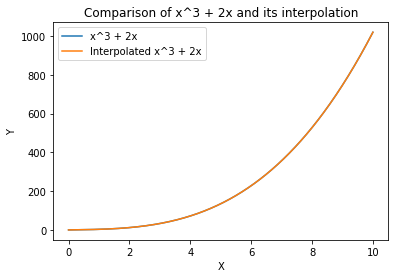

In [103]:
comparison2(0, 10, 7, hermite_rel_errors, hermite_abs_errors)

#### Zadanie 3
Wyjaśnić i zademonstrować efekt Rungego

**Efekt Rungego** polega na pogorszeniu jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.

Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.

Poniżej przedstawiam przykład z użyciem poprzednich danych, jednak na dużo większej liczbie węzłów 
(46 węzłów na przedziale \[0, 10\]),

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  0.2222222222 | 0.4714045208 |
+---------------+--------------+
|  0.4444444444 | 0.6666666667 |
+---------------+--------------+
|  0.6666666667 | 0.8164965809 |
+---------------+--------------+
|  0.8888888889 | 0.9428090416 |
+---------------+--------------+
|  1.1111111111 | 1.0540925534 |
+---------------+--------------+
|  1.3333333333 | 1.1547005384 |
+---------------+--------------+
|  1.5555555556 | 1.2472191289 |
+---------------+--------------+
|  1.7777777778 | 1.3333333333 |
+---------------+--------------+
|  2.0000000000 | 1.4142135624 |
+---------------+--------------+
|  2.2222222222 | 1.4907119850 |
+---------------+--------------+
|  2.4444444444 | 1.5634719199 |
+---------------+--------------+
|  2.6666666667 | 1.6329931619 |
+---------------+--------------+
|  2.8888888889 | 1.6996731712 |
+---------

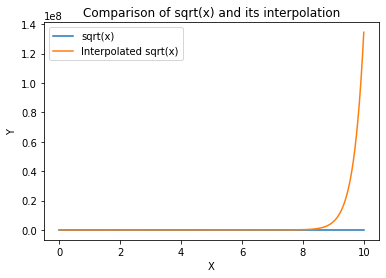

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  0.2222222222 |  0.2203977435 |
+---------------+---------------+
|  0.4444444444 |  0.4299563635 |
+---------------+---------------+
|  0.6666666667 |  0.6183698031 |
+---------------+---------------+
|  0.8888888889 |  0.7763719213 |
+---------------+---------------+
|  1.1111111111 |  0.8961922010 |
+---------------+---------------+
|  1.3333333333 |  0.9719379014 |
+---------------+---------------+
|  1.5555555556 |  0.9998838617 |
+---------------+---------------+
|  1.7777777778 |  0.9786557045 |
+---------------+---------------+
|  2.0000000000 |  0.9092974268 |
+---------------+---------------+
|  2.2222222222 |  0.7952200570 |
+---------------+---------------+
|  2.4444444444 |  0.6420339006 |
+---------------+---------------+
|  2.6666666667 |  0.4572726266 |
+---------------+---------------+
|  2.888888888

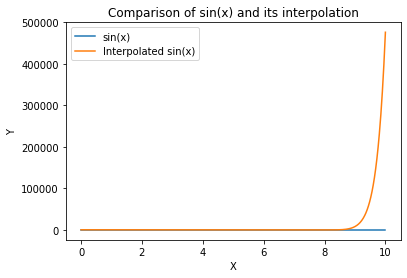

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  0.2222222222 |    0.4554183813 |
+---------------+-----------------+
|  0.4444444444 |    0.9766803841 |
+---------------+-----------------+
|  0.6666666667 |    1.6296296296 |
+---------------+-----------------+
|  0.8888888889 |    2.4801097394 |
+---------------+-----------------+
|  1.1111111111 |    3.5939643347 |
+---------------+-----------------+
|  1.3333333333 |    5.0370370370 |
+---------------+-----------------+
|  1.5555555556 |    6.8751714678 |
+---------------+-----------------+
|  1.7777777778 |    9.1742112483 |
+---------------+-----------------+
|  2.0000000000 |   12.0000000000 |
+---------------+-----------------+
|  2.2222222222 |   15.4183813443 |
+---------------+-----------------+
|  2.4444444444 |   19.4951989026 |
+---------------+-----------------+
|  2.6666666667 |   24.29629

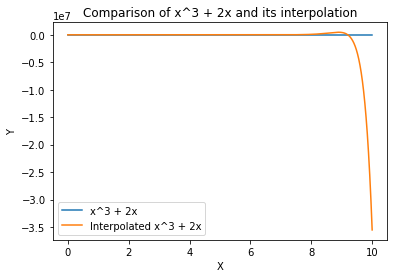

In [104]:
comparison2(0, 10, 45, [], [])

#### Zadanie 4: Interpolacja funkcjami sklejanymi 
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji). 

In [105]:
import scipy.interpolate as interpolate

def to_chart_2(min, max, number_of_points, fun1, fun2, fun_name):
    x_axis = np.linspace(min, max, number_of_points)
    f1_values = fun1(x_axis)
    f2_values = fun2(x_axis)

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="B-spline " + fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Comparison of " + fun_name + " and its interpolation")
    plt.legend()
    plt.show()


def cmp_inbetween_points_2(min, max, number_of_points, fun1, fun2, fun_name, rel_errors, abs_errors):
    table = []
    step = (max - min) / number_of_points
    for x in np.arange(min + (step / 2), max + (step / 2), step):
        table.append([x, fun1(x), fun2(x),
                      abs(fun2(x) - fun1(x)) / fun1(x),
                      abs(fun2(x) - fun1(x))])
        rel_errors.append(abs(fun2(x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(fun2(x) - fun1(x)))
    print(tabulate(table, headers=["x", fun_name, "B-spline", "Relative error", "Absolute error"],
                   tablefmt="grid", floatfmt=".10f"))


def b_spline_calc(x_array, y_array):
    t, c, k = interpolate.splrep(x_array, y_array, s=0, k=2)
    return interpolate.BSpline(t, c, k, extrapolate=False)


def comparison_3(min, max, n, rel_errors, abs_errors):
    sqrt_x_arr, sqrt_y_arr, sqrt_x_y = to_table(min, max, n, math.sqrt, "sqrt(x)")
    sqrt_approx = b_spline_calc(sqrt_x_arr, sqrt_y_arr)
    print(sqrt_x_y)
    cmp_inbetween_points_2(min, max, n, np.sqrt, sqrt_approx, "sqrt(x)", rel_errors, abs_errors)
    to_chart_2(min, max, 1000, np.sqrt, sqrt_approx, "sqrt(x)")

    sin_x_arr, sin_y_arr, sin_x_y = to_table(min, max, n, math.sin, "sin(x)")
    sin_approx = b_spline_calc(sin_x_arr, sin_y_arr)
    print(sin_x_y)
    cmp_inbetween_points_2(min, max, n, np.sin, sin_approx, "sin(x)", rel_errors, abs_errors)
    to_chart_2(min, max, 1000, np.sin, sin_approx, "sin(x)")

    f = lambda x: x**3 + 2*x
    f_x_arr, f_y_arr, f_x_y = to_table(min, max, n, f, "x^3 + 2x")
    f_approx = b_spline_calc(f_x_arr, f_y_arr)
    print(f_x_y)
    cmp_inbetween_points_2(min, max, n, f, f_approx, "x^3 + 2x", rel_errors, abs_errors)
    to_chart_2(min, max, 1000, f, f_approx, "x^3 + 2x")

B-spline dla 3 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 2.5000000000 | 1.5811388301 | 1.2817662756 |     0.1893398282 |     0.2993725545 |
+--------------+--------------+--------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 | 2.8629051057 |     0.0453851376 |     0.1242923182 |
+--------------+--------------+--------------+------------------+------------------+


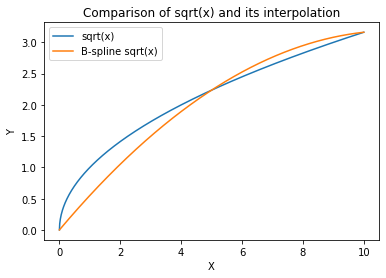

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+--------------+---------------+------------------+------------------+
|            x |       sin(x) |      B-spline |   Relative error |   Absolute error |
+==============+==============+===============+==================+==================+
| 2.5000000000 | 0.5984721441 | -0.6511905671 |     2.0880883489 |     1.2496627112 |
+--------------+--------------+---------------+------------------+------------------+
| 7.5000000000 | 0.9379999768 | -0.9232011226 |     1.9842229696 |     1.8612010994 |
+--------------+--------------+---------------+------------------+------------------+


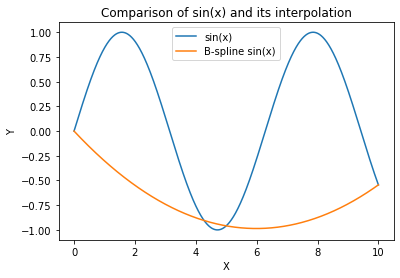

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+----------------+------------------+------------------+
|            x |       x^3 + 2x |       B-spline |   Relative error |   Absolute error |
+==============+================+================+==================+==================+
| 2.5000000000 |  20.6250000000 | -26.2500000000 |     2.2727272727 |    46.8750000000 |
+--------------+----------------+----------------+------------------+------------------+
| 7.5000000000 | 436.8750000000 | 483.7500000000 |     0.1072961373 |    46.8750000000 |
+--------------+----------------+----------------+------------------+------------------+


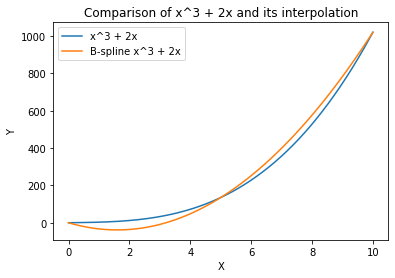

In [106]:
comparison_3(0, 10, 2, bspline_rel_errors, bspline_abs_errors)

B-spline dla 4 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 1.6666666667 | 1.2909944487 | 1.0651731262 |     0.1749204443 |     0.2258213225 |
+--------------+--------------+--------------+------------------+------------------+
| 5.0000000000 | 2.2360679775 | 2.2817061964 |     0.0204100320 |     0.0456382189 |
+--------------+--------------+--------------+------------------+------------------+
| 8.3333333333 | 2.8867513459 | 2.87551271

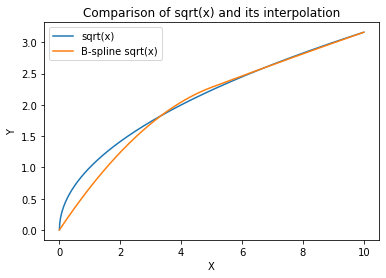

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  3.3333333333 | -0.1905679629 |
+---------------+---------------+
|  6.6666666667 |  0.3741512306 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------+------------------+------------------+
|            x |        sin(x) |      B-spline |   Relative error |   Absolute error |
+==============+===============+===============+==================+==================+
| 1.6666666667 |  0.9954079578 | -0.2363235987 |     1.2374138130 |     1.2317315565 |
+--------------+---------------+---------------+------------------+------------------+
| 5.0000000000 | -0.9589242747 |  0.1372669075 |    -1.1431467647 |     1.0961911822 |
+--------------+---------------+---------------+------------------+------------------+
| 8.3333333333 | 

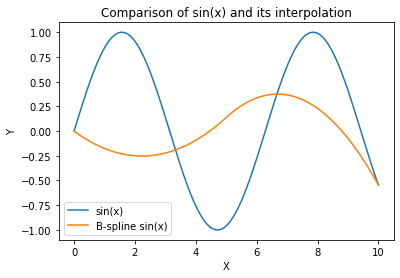

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  3.3333333333 |   43.7037037037 |
+---------------+-----------------+
|  6.6666666667 |  309.6296296296 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+----------------+------------------+------------------+
|            x |       x^3 + 2x |       B-spline |   Relative error |   Absolute error |
+==============+================+================+==================+==================+
| 1.6666666667 |   7.9629629630 |  -1.2962962963 |     1.1627906977 |     9.2592592593 |
+--------------+----------------+----------------+------------------+------------------+
| 5.0000000000 | 135.0000000000 | 135.0000000000 |     0.0000000000 |     0.0000000000 |
+--------------+----------------+----------------+------------------+-

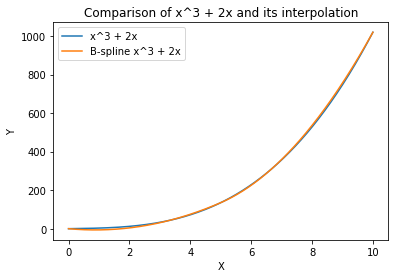

In [107]:
comparison_3(0, 10, 3, bspline_rel_errors, bspline_abs_errors)

B-spline dla 5 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 1.2500000000 | 1.1180339887 | 0.9226650813 |     0.1747432631 |     0.1953689074 |
+--------------+--------------+--------------+------------------+------------------+
| 3.7500000000 | 1.9364916731 | 1.9754212462 |     0.0201031451 |     0.0389295731 |
+--------------+--------------+--------------+---------------

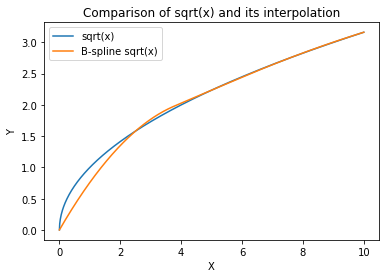

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  2.5000000000 |  0.5984721441 |
+---------------+---------------+
|  5.0000000000 | -0.9589242747 |
+---------------+---------------+
|  7.5000000000 |  0.9379999768 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------+------------------+------------------+
|            x |        sin(x) |      B-spline |   Relative error |   Absolute error |
+==============+===============+===============+==================+==================+
| 1.2500000000 |  0.9489846194 |  0.7133425046 |     0.2483097302 |     0.2356421148 |
+--------------+---------------+---------------+------------------+------------------+
| 3.7500000000 | -0.5715613187 | -0.3446110814 |    -0.3970706727 |     0.2269502373 |
+--------------+---------------+----

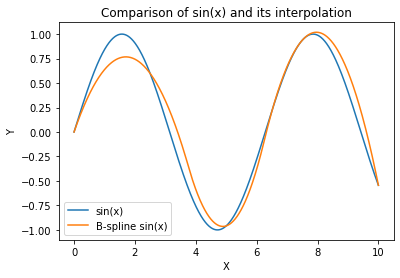

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  2.5000000000 |   20.6250000000 |
+---------------+-----------------+
|  5.0000000000 |  135.0000000000 |
+---------------+-----------------+
|  7.5000000000 |  436.8750000000 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+----------------+------------------+------------------+
|            x |       x^3 + 2x |       B-spline |   Relative error |   Absolute error |
+==============+================+================+==================+==================+
| 1.2500000000 |   4.4531250000 |   0.2678571429 |     0.9398496241 |     4.1852678571 |
+--------------+----------------+----------------+------------------+------------------+
| 3.7500000000 |  60.2343750000 |  61.0714285714 |     0.0138966092 |     0.8370535714 

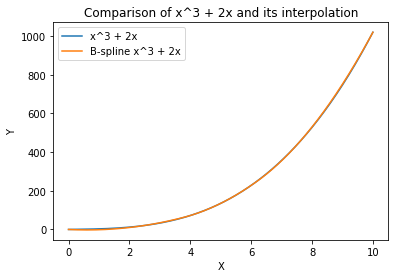

In [108]:
comparison_3(0, 10, 4, bspline_rel_errors, bspline_abs_errors)

B-spline dla 8 węzłów:

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 0.7142857143 | 0.8451542547 | 0.6974862912 |     0.1747230907 |     0.1476679635 |
+--------------+--------------+--

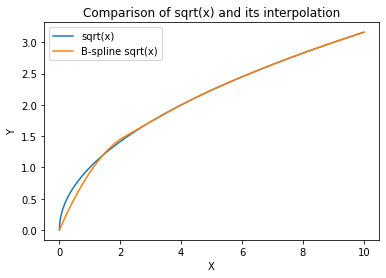

+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0000000000 |  0.0000000000 |
+---------------+---------------+
|  1.4285714286 |  0.9899030764 |
+---------------+---------------+
|  2.8571428571 |  0.2806293995 |
+---------------+---------------+
|  4.2857142857 | -0.9103469443 |
+---------------+---------------+
|  5.7142857143 | -0.5387052884 |
+---------------+---------------+
|  7.1428571429 |  0.7576284154 |
+---------------+---------------+
|  8.5714285714 |  0.7534867274 |
+---------------+---------------+
| 10.0000000000 | -0.5440211109 |
+---------------+---------------+
+--------------+---------------+---------------+------------------+------------------+
|            x |        sin(x) |      B-spline |   Relative error |   Absolute error |
+==============+===============+===============+==================+==================+
| 0.7142857143 |  0.6550778972 |  0.7257751471 |     0.1079218979 |     0.0706972499 |
+-----

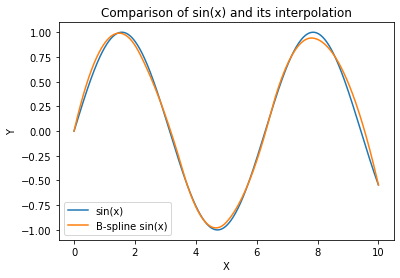

+---------------+-----------------+
|             x |        x^3 + 2x |
+===============+=================+
|  0.0000000000 |    0.0000000000 |
+---------------+-----------------+
|  1.4285714286 |    5.7725947522 |
+---------------+-----------------+
|  2.8571428571 |   29.0379008746 |
+---------------+-----------------+
|  4.2857142857 |   87.2886297376 |
+---------------+-----------------+
|  5.7142857143 |  198.0174927114 |
+---------------+-----------------+
|  7.1428571429 |  378.7172011662 |
+---------------+-----------------+
|  8.5714285714 |  646.8804664723 |
+---------------+-----------------+
| 10.0000000000 | 1020.0000000000 |
+---------------+-----------------+
+--------------+----------------+----------------+------------------+------------------+
|            x |       x^3 + 2x |       B-spline |   Relative error |   Absolute error |
+==============+================+================+==================+==================+
| 0.7142857143 |   1.7930029155 |   1.0199664281 

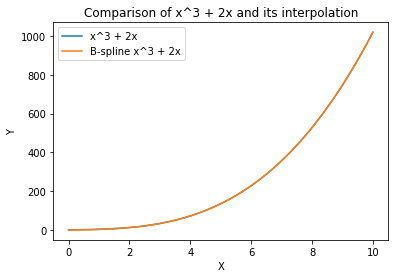

In [109]:
comparison_3(0, 10, 7, bspline_rel_errors, bspline_abs_errors)

## Zestawinie średniej błędów dla poszczególnyh rodzajów interpolacji:

In [110]:
tab = [["Newton's interpolation", (float(sum(newton_rel_errors)/len(newton_rel_errors)) * 100), 
        float(sum(newton_abs_errors)/len(newton_abs_errors))],
       ["Hermite's interpolation", (float(sum(hermite_rel_errors)/len(hermite_rel_errors))) * 100, 
        (float(sum(hermite_abs_errors)/len(hermite_abs_errors)))],
       ["B-spline", (float(sum(bspline_rel_errors)/len(bspline_rel_errors))) * 100, 
        (float(sum(bspline_abs_errors)/len(bspline_abs_errors)))]]

print(tabulate(tab, headers=["Interpolation", "Mean of realtive errors [%]", "Mean of absolute errors"], tablefmt="grid", 
               floatfmt=".2f"))

+-------------------------+-------------------------------+---------------------------+
| Interpolation           |   Mean of realtive errors [%] |   Mean of absolute errors |
+=========================+===============================+===========================+
| Newton's interpolation  |                          5.48 |                      2.14 |
+-------------------------+-------------------------------+---------------------------+
| Hermite's interpolation |                          5.48 |                      2.14 |
+-------------------------+-------------------------------+---------------------------+
| B-spline                |                         21.43 |                      2.76 |
+-------------------------+-------------------------------+---------------------------+


Jak wynika z powyższego porównania, zarówno interpolacja Newtona jak i Hermite'a są porównywalne. Z kolei rezulaty dla krzywej B-sklejanej są zauważalnie gorsze. W praktyce jednak błędy te są małe, a same funkcje B-sklejane posiadają szereg własności sprawiających, że algorytmy na nich oparte mają dobre właściowości numeryczne. Przykładowo, są powszechnie wykorzystywane w grafice komputerowej do modelowania figur o skomplikowanych kształtach.